# <center> Supervised learning. Regression.
## <center> The prediction of individual medical expenses of US citizens paid for by health insurance.
<img src=https://i1.wp.com/storage.googleapis.com/kaggle-datasets-images/13720/18513/71003abbbd54cc65c64065c1de79a9ff/dataset-cover.jpg>

In [207]:
#import libraries
import numpy as np #for matrix calculations
import pandas as pd #for data analysis and preprocessing
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization

from sklearn import linear_model #linear models
from sklearn import metrics #metrics
from sklearn import preprocessing #preprocessing
from sklearn.model_selection import train_test_split #for split data
%matplotlib inline
plt.style.use('seaborn')
!pip install -U scikit-learn

You should consider upgrading via the 'C:\Users\Alex\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


The stages of the CRISP-DM:
1. Requirements analysis
2. Data research
3. Data preparation
4. Modeling
5. Evaluation of the model
6. Implementation of the model

### 1. Requirements analysis

Task: to build an ML model that predicts medical expenses paid by health insurance ('charges'). The average prediction error should not exceed .............

**Getting to know the data**

In [208]:
#read data
data = pd.read_csv('data/insurance2.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [209]:
# Display the data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [210]:
print(data.shape)

(1338, 7)


At the first iteration, we have to come to the conclusion whether the problem is solvable. Can the model get the baseline quality. To do this, we conduct a small data study, basic preprocessing and build a simple model, without selecting parameters.

### 2. Data research

The purpose of this step is to understand the weaknesses and strengths of the data, determine their sufficiency, evaluate the relationship between the features and offer ideas on how to use them.

We output descriptive statistics for numerical and categorical features

In [211]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [212]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [213]:
# Creating a copy of the data to make it easier to work with changes in the table
temp_data = data.copy()

Let's study of the dependence of the target price feature on numerical features.

In [214]:
# Select the names of numerical features in the form of a list for the convenience of further work
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['age', 'bmi', 'children', 'charges']

For each numerical feature, we'll build a histogram of the features and a scattering diagram illustrating the dependence of the target feature on each of the factors. Additionally, we will construct a linear regression equation on top of the scattering diagram.

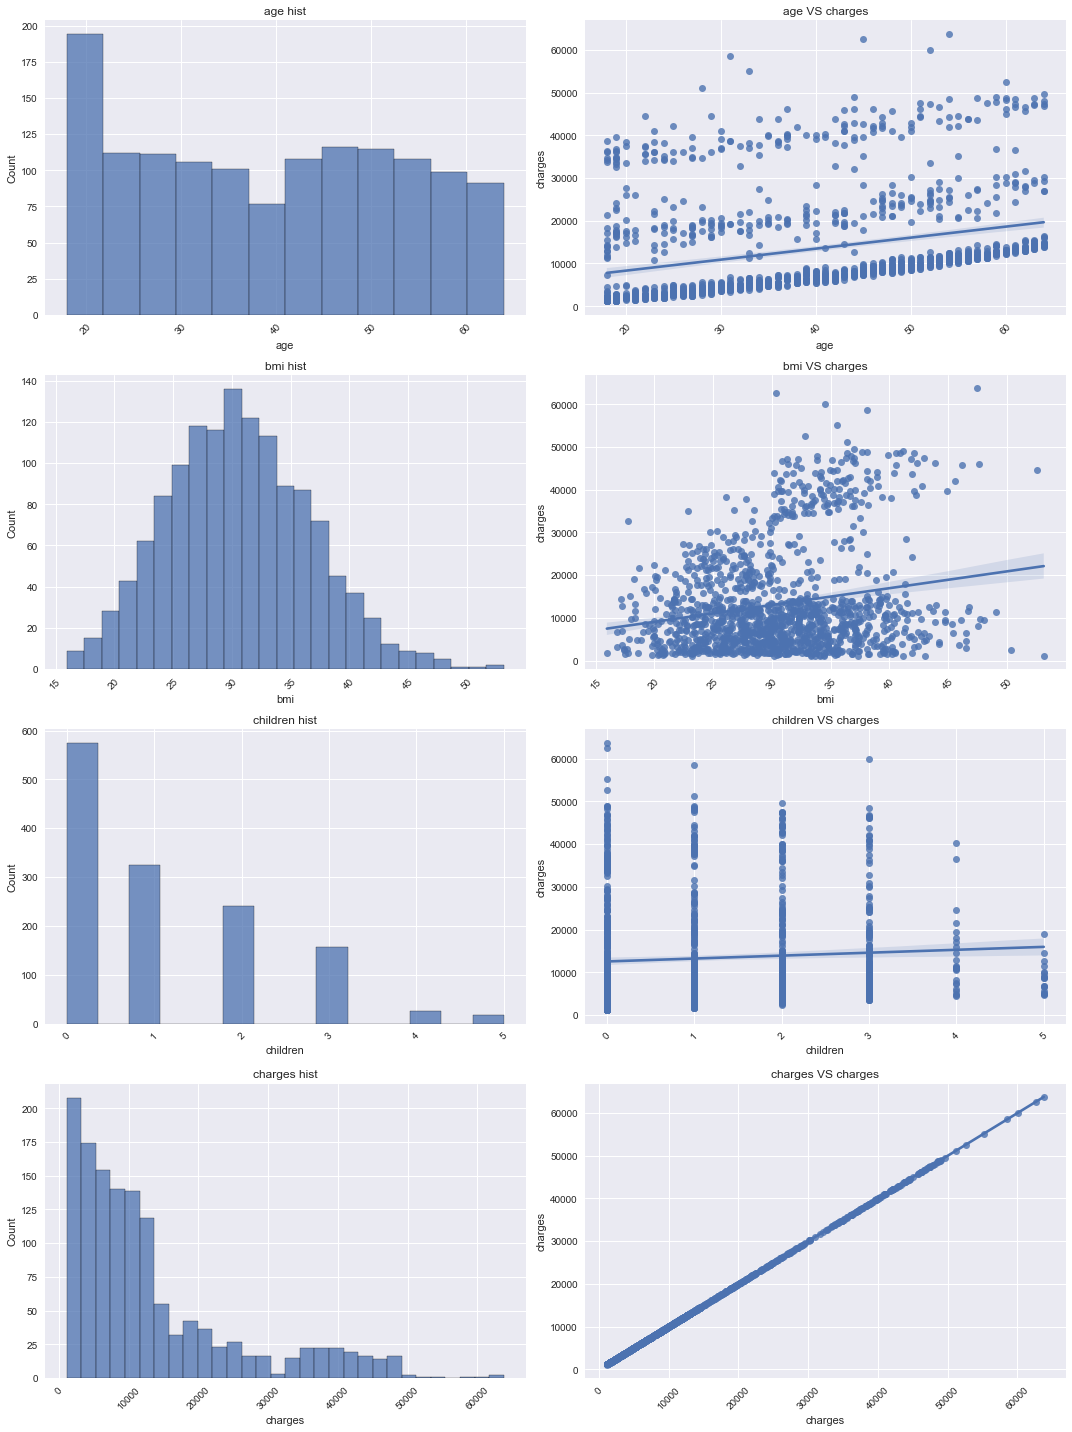

In [215]:
n = len(num_features) # qtn of the numerical features
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # fig + n х 2 axes
# Creat the loop for all numerical features
for i, feature in enumerate(num_features): # i- index, feature - name of the feature
    # Build histogram
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    # Add title
    histplot.set_title('{} hist'.format(feature))
    # Add rotation
    histplot.xaxis.set_tick_params(rotation=45)
    # Build scatter plot + linear regression
    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    # Add title
    regplot.set_title('{} VS charges'.format(feature));
    # Add rotation
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() # alignment of plots

Let's build a heat map for the correlation matrix in order to evaluate the multicollinear dependence and the linear relationship between the factors and the target feature (charges)

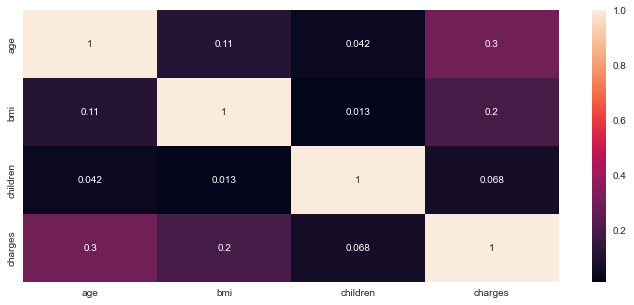

In [216]:
# Heatmap of correlation
fig = plt.figure(figsize=(12, 5))
sns.heatmap(temp_data.corr(), annot=True);

### 3. Data preparation

The purpose of this stage is to prepare a training sample for use in modeling.

The linear regression we will use is a model that requires a numerical representation of the data. That is, at the stage of data preparation, we must take care of encoding textual categorical features.

In addition, if there are data gaps in your data, then it is necessary to reverse them, since data gaps will cause an error when submitting data to the model.

In [217]:
# Let's check the gaps in the data
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The data contains several types of features:
*   *age, bmi, children* - numerical features
*   *sex, smoker* - binary, categorical features
*   *region* - multiple categorical feature
*   *charges* - numerical target feature

Let's encode categorical features:

*   smoker - binary (0 - no smoker, 1 - smoker)
*   sex - binary (0 - female, 1 - male)
*   region - (OneHot- encoding)



In [218]:
# encoding binary features
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'famale' else 1)

# encoding region feature by OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Split the dataset into a matrix of observations X (a table of objects and their features) and a column of correct answers y

In [219]:
# X - matrix of observations, y - correct answers
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

We split the dataset into training and test in the ratio of 80/20.

We will train models on the training sample, and check their quality on the test sample. 

In [220]:
# Create the train and test data by train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state=42, # num for generate random numbers
    test_size=0.2 # size test data
)
# Display size of the samples
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (1070, 9)
Test shape: (268, 9)


### 4. Modeling and evaluation of the model

The purpose of the stage is to build a model that solves the task and assess its quality

The function for the calculating metrics:

1. MAE - Mean Absolut Error (target metric)
2. MAPE - Mean Absolut Percent Error 
3. $R^2$ - coefficient of determination

In [221]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print(f'Train R^2: {round(metrics.r2_score(y_train, y_train_predict),3)}')
    print(f'Train MAE: {round(metrics.mean_absolute_error(y_train, y_train_predict))}')
    print(f'Train MAPE: {round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)}')
    print('\n')
    print(f'Test R^2: {round(metrics.r2_score(y_test, y_test_predict),3)}')
    print(f'Test MAE: {round(metrics.mean_absolute_error(y_test, y_test_predict))}')
    print(f'Test MAPE: {round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)}')

#### **Linear regression model:**

The linear regression model has the following form:
$$\widehat{y_i}= w_0+\sum_{j=0}^m w_j x_{ij}$$
$x_{ij}$ — object from $i$-th row and $j$-th column from $X$, 
<br>$y_i$ — correct answer, corresponding to $x_{i}$,
<br> $\omega$ — parameters of the linear regression

The empirical risk minimization scheme is used to search for model parameters - we are looking for such parameters $\omega$, in which the error function is $L(\omega)$ would be minimal. 

As a loss function, we use MSE - the Mean Squared Error.

$$L(\omega) = MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - \widehat{y_i})^2} \Rightarrow min_\omega $$

#### **Analytical solution: Ordinary Least Squares (OLS):**

$$\omega=(X^TX)^{-1}X^Ty$$

In the sklearn library linear regression (OLS solution) implemented in the  LinearRegression class of linear_model module. 

Methods:
* fit() - OLS parameter fitting (model training)
* predict() - prediction (substituting observation $x_i$ into the model and getting an answer for each observation)

Attributes:
* coef_ - OLS coefficients: $\omega_1, \omega_2,$...,$\omega_m$ (as a vector)
* intercept_ -  $\omega_0$

In [222]:
# Initialize the LinearRegression class of  the linear_model
lr = linear_model.LinearRegression()
# Train the model - lokking for the parameters
lr.fit(X_train, y_train)

print(np.round(lr.intercept_, 2)) # w0 parameter

-12399.02


In [223]:
# Make the prediction
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Display the metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4182
Test MAPE: 47


Let's build the boxplot to visualize the errors of the linear regression model on the train and test datasets.

Text(0, 0.5, 'Model')

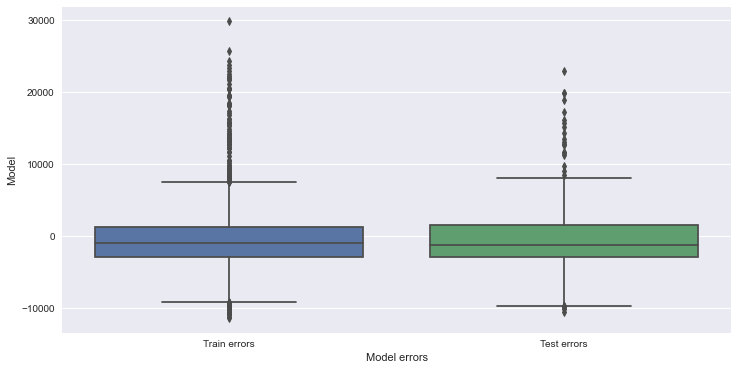

In [224]:
# Let's visualize errors
fig, ax = plt.subplots(figsize=(12, 6))
# Model errors on the train data
y_train_errors = y_train - y_train_pred
# Model errors on the test data
y_test_errors = y_test - y_test_pred
# Create the DataFrame for errors
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
# Let's build the boxplot for errors
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') 
ax.set_ylabel('Model')

The error spread in the train data is greater than in the test data.

#### **Polynomial regression model:**

Let's try to add polynomial features to the data and build a polynomial regression model. Pre-normalize the data:

In [225]:
# Create the object for min-max normalization
scaler = preprocessing.MinMaxScaler()
# Calculate parameters for normalization
scaler.fit(X_train)
# Perform the conversion for each of the samples
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an object for generating polynomial features of degree 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
# Calculate the generation parameters
poly.fit(X_train_scaled)
# Perform the conversion for each dataset
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print(f'Train shape: {X_train_scaled_poly.shape}')
print(f'Test shape: {X_test_scaled_poly.shape}')

Train shape: (1070, 54)
Test shape: (268, 54)


Let's try to train a linear regression model on the generated data. 

In [226]:
# Initialize the LinearRegression class of the linear_model
lr_poly = linear_model.LinearRegression()

# Train the model - lokking for the parameters
lr_poly.fit(X_train_scaled_poly, y_train)

# Make the prediction
y_train_pred_poly = lr_poly.predict(X_train_scaled_poly)
y_test_pred_poly = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_pred_poly, y_test, y_test_pred_poly)

Train R^2: 0.84
Train MAE: 2908
Train MAPE: 30


Test R^2: 0.869
Test MAE: 2690
Test MAPE: 30


In [227]:
print(lr_poly.coef_)

[-1.40822719e+16  1.90692407e+13  1.90624492e+15 -3.74922991e+15
  1.06643561e+14 -2.47613925e+14 -1.45816219e+14 -1.41523897e+14
 -3.66304342e+14  8.39000000e+03 -6.28280165e+13  6.61000000e+02
 -1.14500000e+03  2.23500000e+02  1.40822719e+16  1.40822719e+16
  1.40822719e+16  1.40822719e+16  4.95701340e+12 -7.06676561e+13
  3.24809998e+13  3.43810139e+13  4.76485510e+13  2.99328553e+13
 -4.41972919e+13  1.71784684e+12 -8.86123047e+03  1.56272754e+03
  5.42774018e+04 -1.90624492e+15 -1.90624492e+15 -1.90624492e+15
 -1.90624492e+15 -2.50000000e+03 -2.18150000e+03  3.74922991e+15
  3.74922991e+15  3.74922991e+15  3.74922991e+15  7.33167184e+13
 -1.79960280e+14 -1.79960280e+14 -1.79960280e+14 -1.79960280e+14
 -8.12110548e+11  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.02609817e+14  0.00000000e+00  0.00000000e+00 -1.06902139e+14
  0.00000000e+00  1.17878306e+14]


#### **Linear regression with L1 regularization. Lasso**

In [228]:
# Initialize an object of the linear regression class with L1 regularization
lasso_lr_poly = linear_model.Lasso(max_iter=2000)
# Train the model
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
# Make a prediction
y_train_pred_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_pred_lasso = lasso_lr_poly.predict(X_test_scaled_poly)
# Display the metrics
print_metrics(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)

Train R^2: 0.84
Train MAE: 2901
Train MAPE: 30


Test R^2: 0.869
Test MAE: 2682
Test MAPE: 30


#### **Linear regression with L2 regularization. Ridge**

In [229]:
# Initialize an object of the linear regression class with L1 regularization
ridge_lr_poly = linear_model.Ridge()
# Train the model
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
# Make a prediction
y_train_pred_ridge = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_pred_ridge = ridge_lr_poly.predict(X_test_scaled_poly)
# Display the metrics
print_metrics(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)

Train R^2: 0.837
Train MAE: 2956
Train MAPE: 30


Test R^2: 0.866
Test MAE: 2835
Test MAPE: 31
